# Dial-a-ride problem: Complexity analysis

In [1]:
import json
import math
from decimal import Decimal
from pprint import pprint

input_data_json = {"map_locations": 10, "n_requests": 5, "n_vehicles": 5}

description_input = {
    "map_locations": "Map locations",
    "n_requests": "N. of requests",
    "n_vehicles": "N. of PAVs",
}

In [2]:
def format_big_number(n):
    return f"{Decimal(n):.2E}"


format_big_number(math.factorial(input_data_json["map_locations"]))

'3.63E+6'

In [3]:
from scipy.special import comb


def get_problem_dimension(problem_input, format_number=True):
    state_space_fav = (
        problem_input["map_locations"]
        * problem_input["n_stations"]
        * problem_input["contract_durations"]
    )

    state_space_pav = problem_input["map_locations"]

    resource_attribute = state_space_fav + state_space_pav

    demand_attribute = (
        problem_input["n_classes"]
        * problem_input["map_locations"]
        * (problem_input["map_locations"] - 1)
    )

    decisions = demand_attribute + problem_input["map_locations"]

    resource_space_pav = comb(
        state_space_pav, problem_input["n_pavs"], exact=True, repetition=True
    )

    resource_space_fav = comb(
        state_space_fav, problem_input["n_favs"], exact=True, repetition=True
    )

    request_space = comb(
        demand_attribute,
        problem_input["n_requests"],
        exact=True,
        repetition=True,
    )

    resource_space = resource_space_pav * resource_space_fav

    decision_space = comb(
        resource_attribute * decisions,
        problem_input["n_pavs"] + problem_input["n_favs"],
        exact=True,
        repetition=True,
    )

    exogenous_information = resource_space_fav * request_space

    state_space = resource_space * request_space

    result = dict(
        state_space_fav=state_space_fav,
        state_space_pav=state_space_pav,
        resource_attribute=resource_attribute,
        demand_attribute=demand_attribute,
        decisions=decisions,
        system_state=demand_attribute + resource_attribute,
        decision_vector=resource_attribute * decisions,
        random_outcome_vector=state_space_fav + demand_attribute,
        resource_space_fav=resource_space_fav,
        resource_space_pav=resource_space_pav,
        resource_space=resource_space,
        request_space=request_space,
        state_space=state_space,
        decision_space=decision_space,
        exogenous_information=exogenous_information,
    )

    if format_number:
        result_formatted = {}
        for k, v in result.items():
            result_formatted[k] = format_big_number(v)
        result = result_formatted

    return result


description_output = json.loads(
    '{"state_space_fav": "FAV attribute vectors", "state_space_pav":"PAV attribute vectors","resource_attribute":"AV attribute vectors","system_state":"System state", "decision_vector": "Dim. decision vector", "random_outcome_vector":"Dim. exogenous info. vector","demand_attribute": "Demand attribute vectors","decisions":"Decisions","resource_space_pav":"PAV resource state vectors","resource_space": "R_t possible settings","request_space": "Demand realizations","resource_space_fav":"FAV distributions","decision_space":"Decision space size","state_space": "State space size","exogenous_information": "Outcome space size"}'
)

result_small = get_problem_dimension(problem_input_small)
pprint(result_small)

result_paper = get_problem_dimension(problem_input_paper)
pprint(result_paper)

NameError: name 'problem_input_small' is not defined

In [20]:
import pandas as pd

d = {
    "description": [description_input[k] for k in problem_input_small.keys()]
    + [description_output[k] for k in result_small.keys()],
    "small": list(problem_input_small.values()) + list(result_small.values()),
    "paper": list(problem_input_paper.values()) + list(result_paper.values()),
}
index = list(problem_input_small.keys()) + list(result_small.keys())

df = pd.DataFrame(data=d, index=index)
df

,description,small,paper
map_locations,Map locations,10,6430
n_requests,N. of requests,5,10
n_pavs,N. of PAVs,5,300
n_favs,N. of FAVs,5,100
n_stations,N. of stations,2,643
n_classes,N. of classes,2,2
contract_durations,N. of contract durations,4,4
state_space_fav,FAV attribute vectors,8.00E+1,1.65E+7
state_space_pav,PAV attribute vectors,1.00E+1,6.43E+3
resource_attribute,AV attribute vectors,9.00E+1,1.65E+7


In [21]:
list(zip(result_small.values(), result_paper.values()))

[('8.00E+1', '1.65E+7'),
 ('1.00E+1', '6.43E+3'),
 ('9.00E+1', '1.65E+7'),
 ('1.80E+2', '8.27E+7'),
 ('1.90E+2', '8.27E+7'),
 ('2.70E+2', '9.92E+7'),
 ('1.71E+4', '1.37E+15'),
 ('2.60E+2', '9.92E+7'),
 ('3.09E+7', '7.56E+563'),
 ('2.00E+3', '9.14E+530'),
 ('6.18E+10', '6.90E+1094'),
 ('1.66E+9', '4.11E+72'),
 ('1.03E+20', '2.84E+1167'),
 ('5.91E+35', '4.18E+5185'),
 ('5.14E+16', '3.11E+636')]

100 100


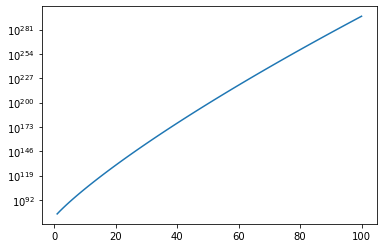

In [22]:
import matplotlib.pyplot as plt
import numpy as np

max_n = 100
y_map = []
y_pavs = []
for n in range(1, max_n + 1):
    input_data_json_only_pavs = '{"map_locations": 6430, "n_requests":10,"n_pavs":300,"n_favs":0,"n_stations":643,"n_classes":2,"contract_durations":4}'
    problem_input = json.loads(input_data_json_only_pavs)
    problem_input["n_pavs"] = n
    y_pavs.append(
        get_problem_dimension(problem_input, format_number=False)[
            "state_space"
        ]
    )

x = np.linspace(1, max_n, max_n)
print(len(x), len(y_pavs))
plt.plot(x, y_pavs)
plt.yscale("log")